# KNN

More information [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

## Imports

In [2]:
import math
import time
from sklearn import model_selection
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv('./fer2013.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


## Data Processing

In [3]:
from matplotlib import pyplot as plt

#usage is not needed, so it is dropped
df = df.drop(columns=['Usage'])

#obtain values we wish to predict as a vector
y = df['emotion'].values

pixels = df['pixels'].values

x = []

for i in pixels:
    str_list = i.split()
    x.append(np.array(list(map(int, str_list)))/255)

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']


In [4]:
#np.array() creates a array
X_train, X_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size = 0.1)
X = np.array(x)
y = np.array(y)

In [5]:
print(df['emotion'].unique())

[0 2 4 6 3 5 1]


## Model and training

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.metrics import classification_report

neighbor = KNeighborsClassifier(n_neighbors=1)
neighbor.fit(X_train, y_train)
y_pred_neighbor = neighbor.predict(X_test)
print(classification_report(y_test, y_pred_neighbor))

              precision    recall  f1-score   support

           0       0.38      0.31      0.34       505
           1       0.39      0.53      0.45        59
           2       0.39      0.36      0.37       506
           3       0.45      0.42      0.43       885
           4       0.38      0.34      0.36       633
           5       0.57      0.59      0.58       403
           6       0.32      0.45      0.37       598

    accuracy                           0.41      3589
   macro avg       0.41      0.43      0.42      3589
weighted avg       0.41      0.41      0.40      3589



## Confusion matrix

In [7]:
KNN_matrix = confusion_matrix(y_test, y_pred_neighbor, labels = [0,1,2,3,4,5,6])
print(KNN_matrix)

[[156   7  49 102  67  31  93]
 [  4  31   2   6   6   3   7]
 [ 49   5 182  90  58  37  85]
 [ 71  15  70 369 108  48 204]
 [ 61   8  82 103 213  26 140]
 [ 20   2  31  39  29 236  46]
 [ 46  11  50 117  76  30 268]]


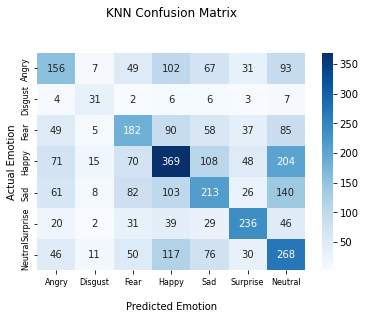

In [8]:
import seaborn as sns

knn_cm = sns.heatmap(KNN_matrix, annot=True, cmap='Blues', fmt='g')
knn_cm.set_title('KNN Confusion Matrix\n\n');
knn_cm.set_xlabel('\nPredicted Emotion')
knn_cm.set_ylabel('Actual Emotion');
knn_cm.xaxis.set_ticklabels(emotions, fontsize=8)
knn_cm.yaxis.set_ticklabels(emotions, fontsize=8)
plt.show()

## Performance

In [9]:
neighbor = KNeighborsClassifier(n_neighbors=2)
neighbor.fit(X_train, y_train)
y_pred_neighbor = neighbor.predict(X_test)
print(classification_report(y_test, y_pred_neighbor))

              precision    recall  f1-score   support

           0       0.30      0.41      0.34       505
           1       0.29      0.56      0.38        59
           2       0.29      0.40      0.33       506
           3       0.40      0.45      0.42       885
           4       0.37      0.27      0.31       633
           5       0.57      0.39      0.46       403
           6       0.38      0.21      0.27       598

    accuracy                           0.36      3589
   macro avg       0.37      0.38      0.36      3589
weighted avg       0.38      0.36      0.36      3589

